# Logistic regression to classify the breast cancer data into Malignine and Benign

# Link to dataset: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Technical/Teaching/DataScience/ML/implementation/datasets/classification/breast-cancer.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
data.drop('id', axis = 1, inplace = True)

In [6]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [8]:
data['diagnosis'].replace({'M':1, 'B':0}, inplace = True)

In [9]:
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [10]:
X = data.drop('diagnosis', axis = 1).to_numpy()
Y = data['diagnosis'].values

In [11]:
X.shape

(569, 30)

In [12]:
Y.shape

(569,)

In [13]:
X = np.c_[np.ones(len(X)), X]

In [14]:
X.shape

(569, 31)

In [15]:
X = X.T

In [16]:
X.shape

(31, 569)

# Compute Hypothesis (Sigmoid function) implementation

In [17]:
def compute_hypothesis(params, X):
    z = np.matmul(params.T, X)
    predictions = 1/(1+np.exp(-z))
    return predictions

# Predict classes

In [19]:
def predict_classes(predictions):
    predicted_classes = np.zeros(len(predictions))
    predicted_classes[np.where(predictions>=0.5)] = 1
    return predicted_classes

# Calculate accuracy

In [20]:
def calculate_accuracy(class_predictions, actual):
    accuracy = (sum(class_predictions==actual)/len(actual))*100
    return accuracy

# Compute cost (log loss/ cross-entropy loss function) implementation

In [32]:
def compute_cost(predictions, actual):
    m = len(actual)
    log_of_predictions = np.log(predictions)
    log_of_oneMinusPredictions = np.log(1-predictions)
    cost = -(1/m)*np.sum(((actual*log_of_predictions) + ((1-actual)*(log_of_oneMinusPredictions))))
    return cost

# Gradient Descent implementation

In [21]:
def gradient_descent(X, Y, learning_rate, iterations):
    acutal = Y
    costs = []
    accuracies = []
    params = np.zeros(X.shape[0])
    m = len(actual)
    
    for i in range(iterations):
        predictions = compute_hypothesis(params, X)
        class_predictions = predict_classes(predictions)
        accuracies.append(calculate_accuracy(class_predictions, actual))
        costs.append(compute_cost(predictions, actual))
        errors = predictions - actual
        gradients = (1/m)*np.matmul(X,errors)
        params = params - (learning_rate*gradients)
    
    return params, costs, accuracies

In [42]:
learning_rate = 0.000001
iterations = 1000
params, costs, accuracies = gradient_descent(X, Y, learning_rate, iterations)

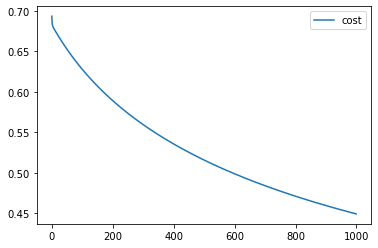

In [43]:
plt.plot(np.arange(1000), costs, label='cost' )
plt.legend(loc='upper right')

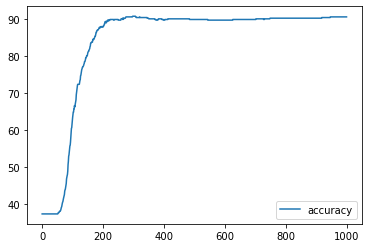

In [44]:
plt.plot(np.arange(1000), accuracies, label='accuracy' )
plt.legend(loc='lower right')

In [45]:
accuracies[0]

37.258347978910365

In [46]:
accuracies[-1]

90.68541300527241

# Verification

In [22]:
params = np.zeros(X.shape[0])
predictions = compute_hypothesis(params, X)

In [23]:
len(predictions)

569

In [25]:
actual = Y
m = len(actual)
log_of_predictions = np.log(predictions)
log_of_oneMinusPredictions = np.log(1-predictions)
cost = -(1/m)*np.sum(((actual*log_of_predictions) + ((1-actual)*(log_of_oneMinusPredictions))))

In [26]:
cost

0.6931471805599453

In [27]:
learning_rate = 0.00001
errors = predictions - actual
gradients = (1/m)*np.matmul(X,errors)
params = params - (learning_rate*gradients)

In [28]:
len(gradients)

31

In [29]:
len(params)

31